In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [103]:
houses_train = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/train.csv')
houses_test = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/test.csv')

In [104]:
print(f"Houses train: {houses_train.shape}")
print(f"Houses test: {houses_test.shape}")

Houses train: (1460, 81)
Houses test: (1459, 80)


In [105]:
duplicated_train = not houses_train["Id"].is_unique
duplicated_train = houses_train['Id'].duplicated().any()
print(duplicated_train)

False


In [106]:
duplicated_test = not houses_test["Id"].is_unique
duplicated_test = houses_test['Id'].duplicated().any()
print(duplicated_test)

False


In [107]:
houses_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

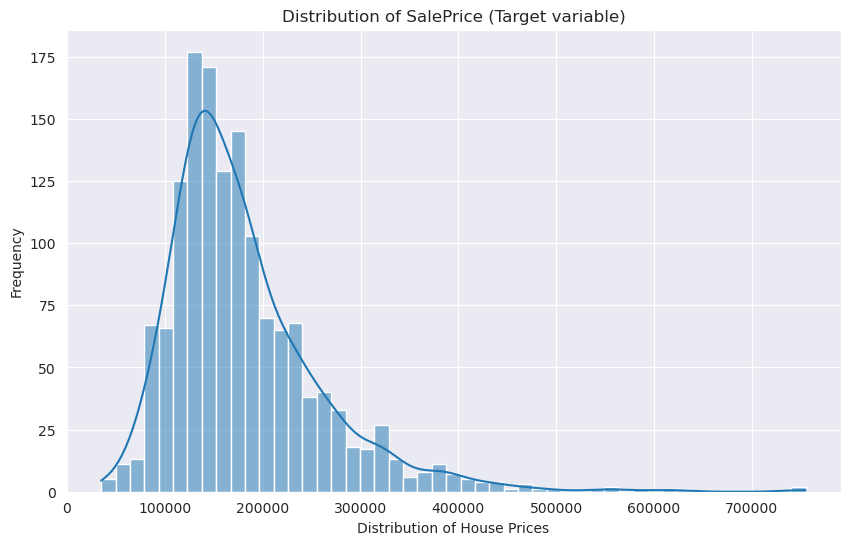

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(data=houses_train, x="SalePrice",  kde=True)
plt.title('Distribution of SalePrice (Target variable)')
plt.xlabel('Distribution of House Prices')
plt.ylabel('Frequency')
plt.show()

In [109]:
print("Skewness: %f" % houses_train['SalePrice'].skew())
print("Kurtosis: %f" % houses_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [110]:
def cleaning_data(data, threshold=0.70):
    df = data.copy()

    if 'Id' in df.columns:
        df = df.drop(columns=['Id'], axis=1)

    total_null = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum() / len(df)).sort_values(ascending=False)

    missing_values = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percent'])
    print("Missing Values Summary:")
    print(missing_values.head(20))

    missing_features = percentage[percentage > threshold].index.tolist()
    df = df.drop(missing_features, axis=1)
    print(f"\nFeatures dropped: {missing_features}")
    print(f"Remaining missing values:\n{df.isnull().sum()}")

    return df

In [111]:
houses_train = cleaning_data(houses_train)
houses_test = cleaning_data(houses_test)

Missing Values Summary:
              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
MSSubClass        0  0.000000

Features dropped: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
Remaining missing values:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64
M

In [112]:
def separate_variables(data):
    cat_cols = list(data.select_dtypes(include=['object']).columns)
    num_cols = list(data.select_dtypes(include=np.number).columns)
    return cat_cols, num_cols

In [113]:
cat_train, num_train = separate_variables(houses_train)
cat_test, num_test = separate_variables(houses_test)

MSSubClass
Skew : 1.41


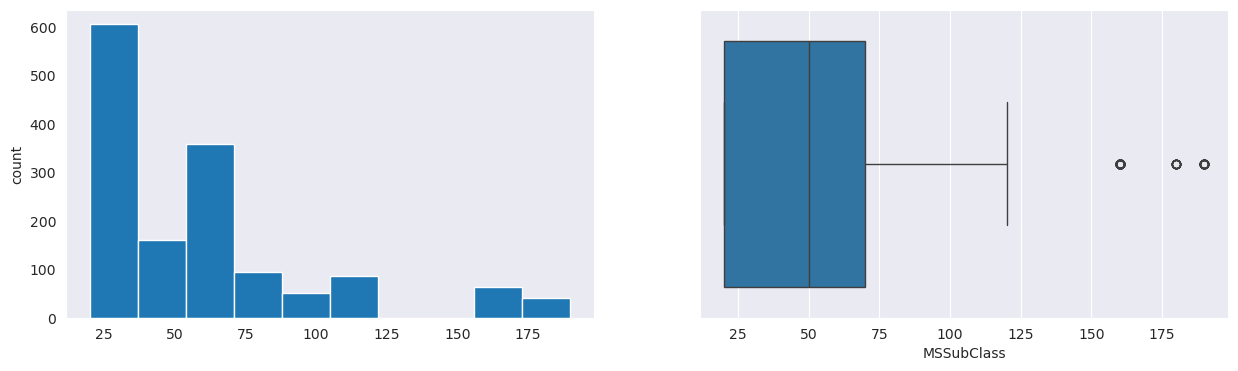

LotFrontage
Skew : 2.16


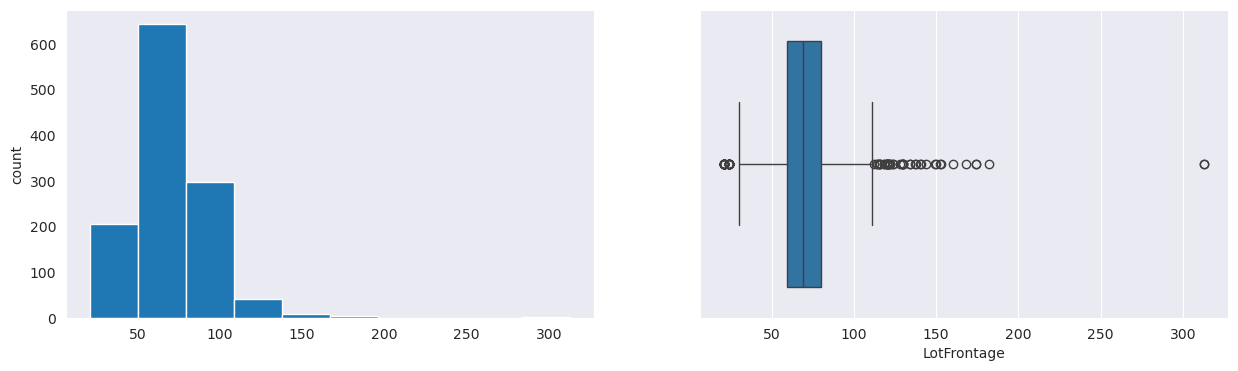

LotArea
Skew : 12.21


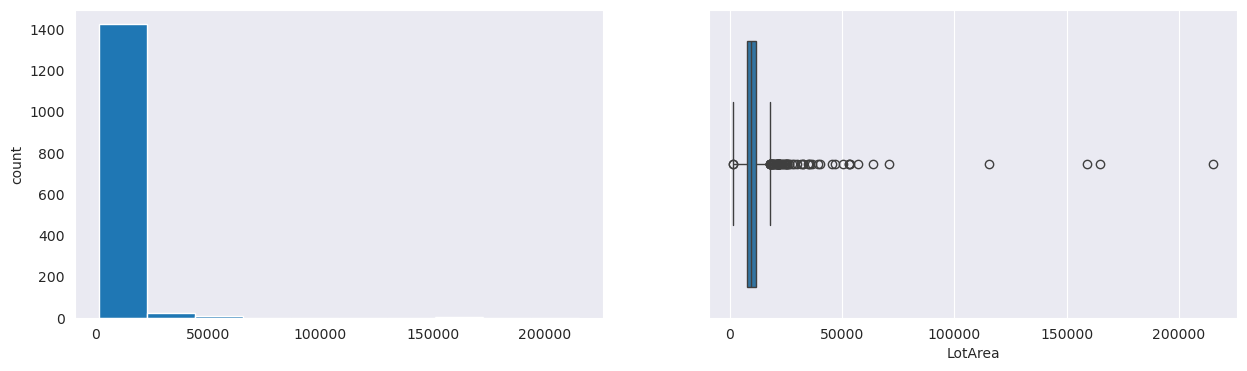

OverallQual
Skew : 0.22


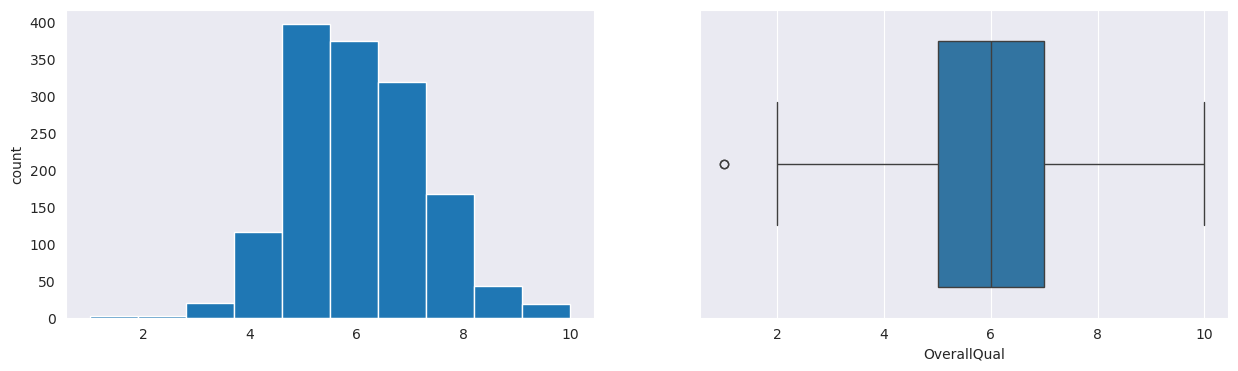

OverallCond
Skew : 0.69


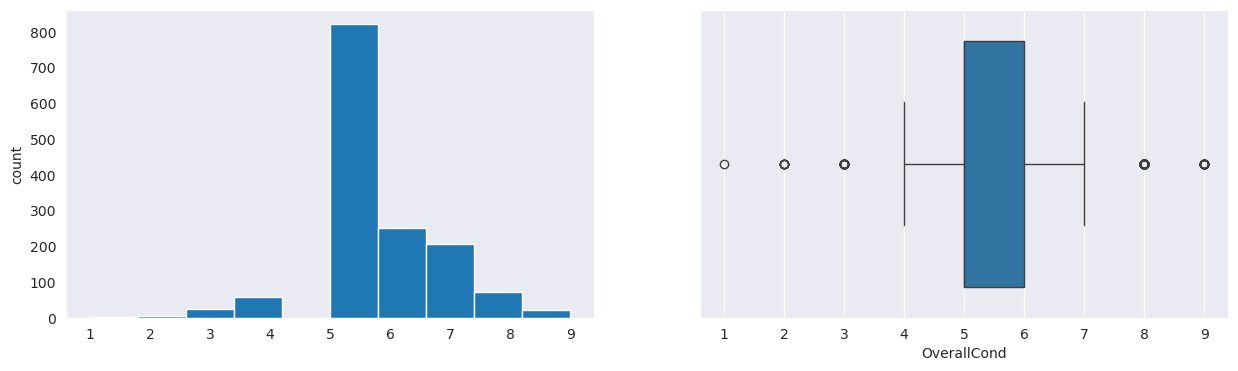

YearBuilt
Skew : -0.61


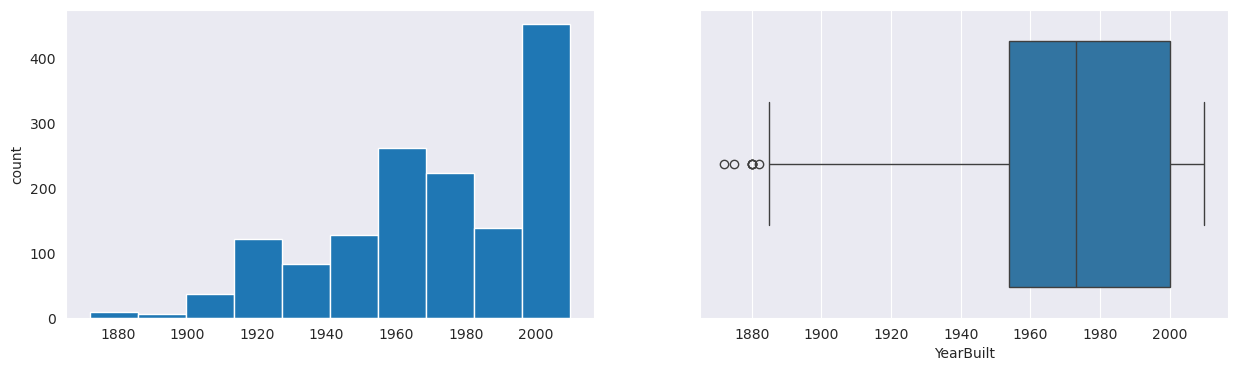

YearRemodAdd
Skew : -0.5


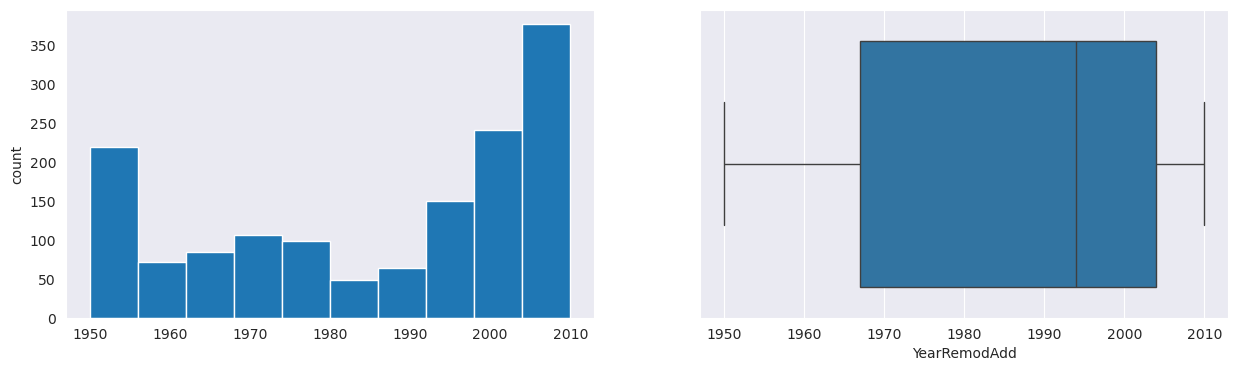

MasVnrArea
Skew : 2.67


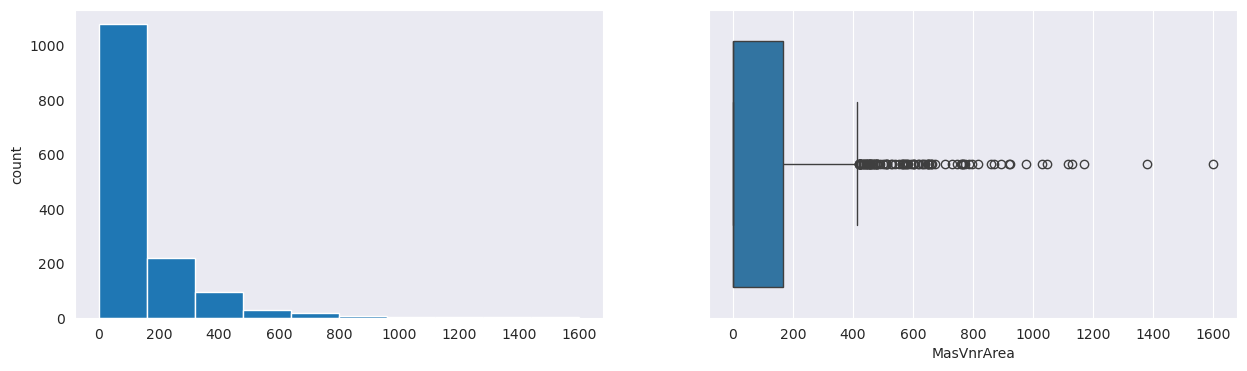

BsmtFinSF1
Skew : 1.69


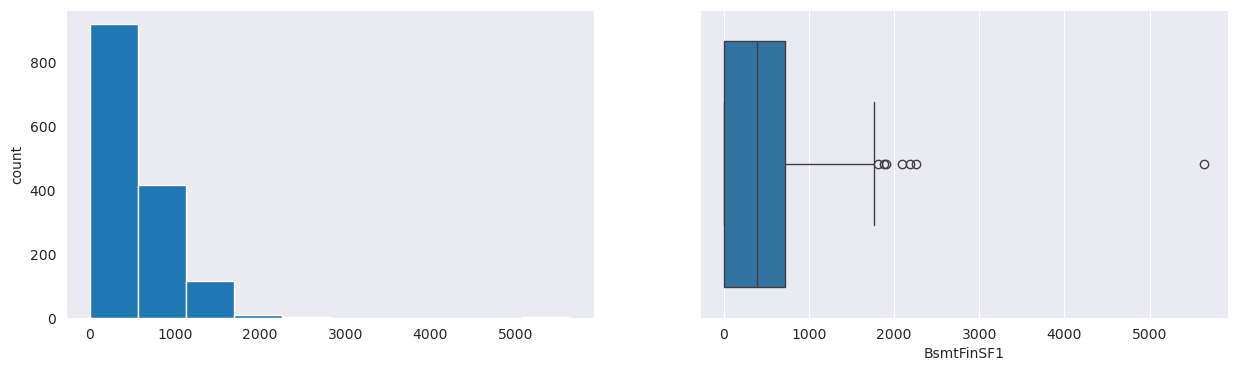

BsmtFinSF2
Skew : 4.26


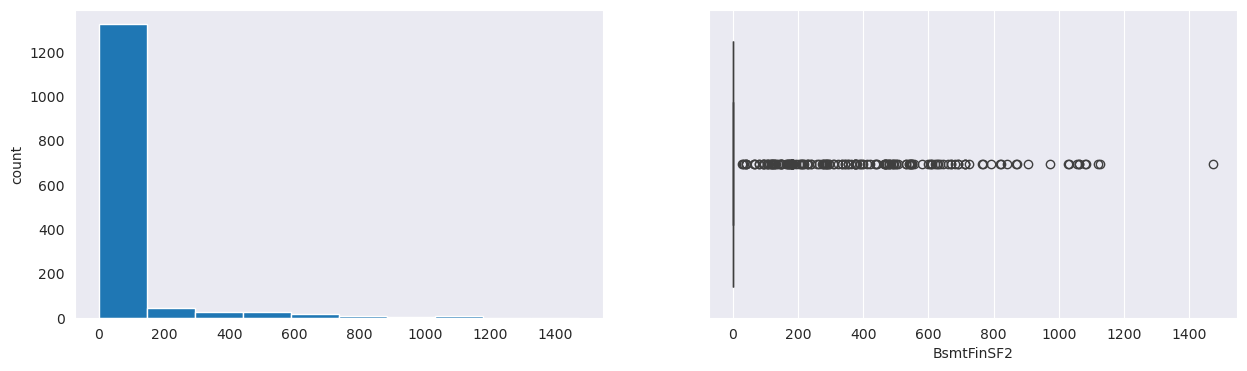

BsmtUnfSF
Skew : 0.92


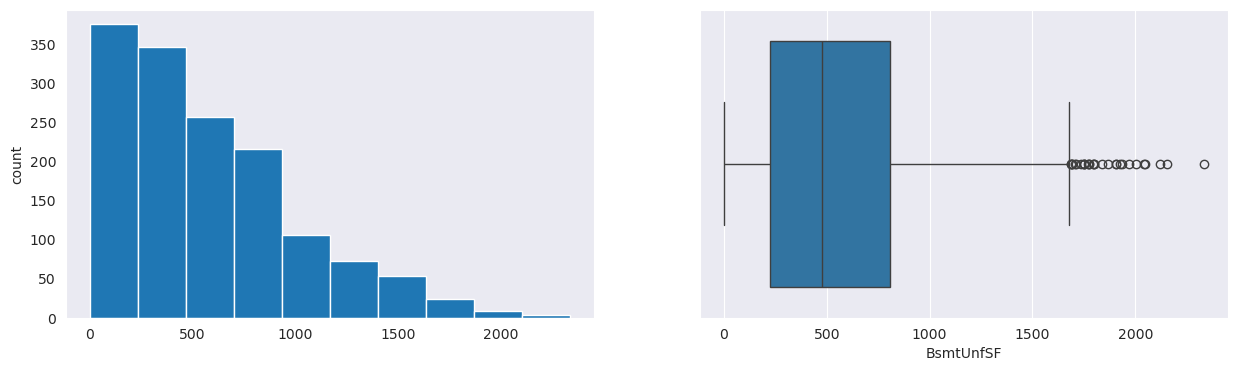

TotalBsmtSF
Skew : 1.52


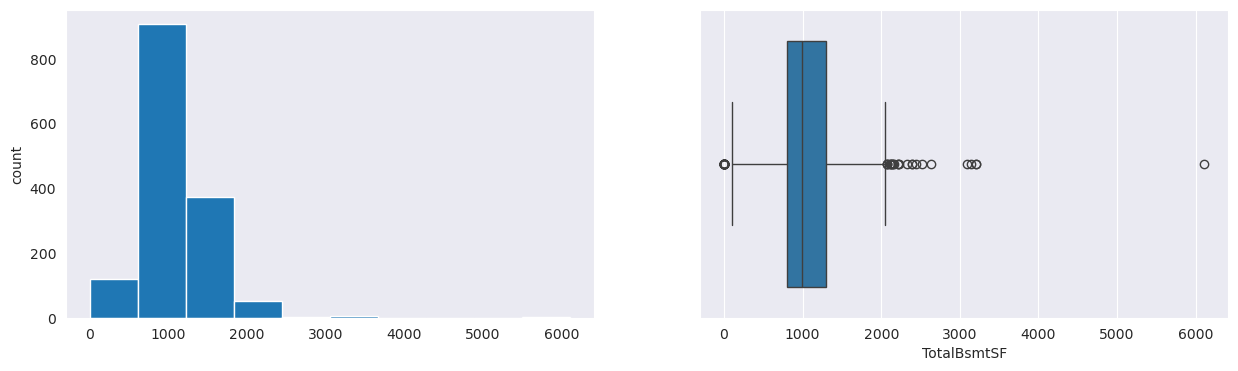

1stFlrSF
Skew : 1.38


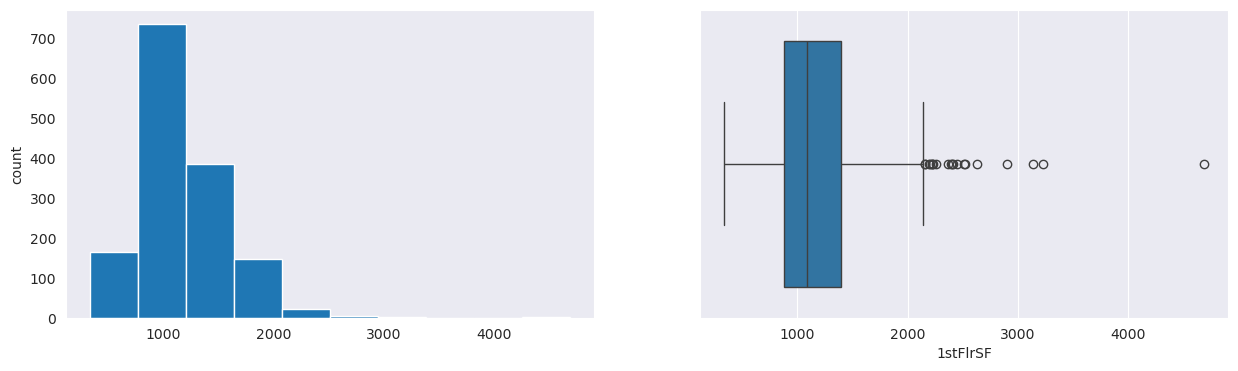

2ndFlrSF
Skew : 0.81


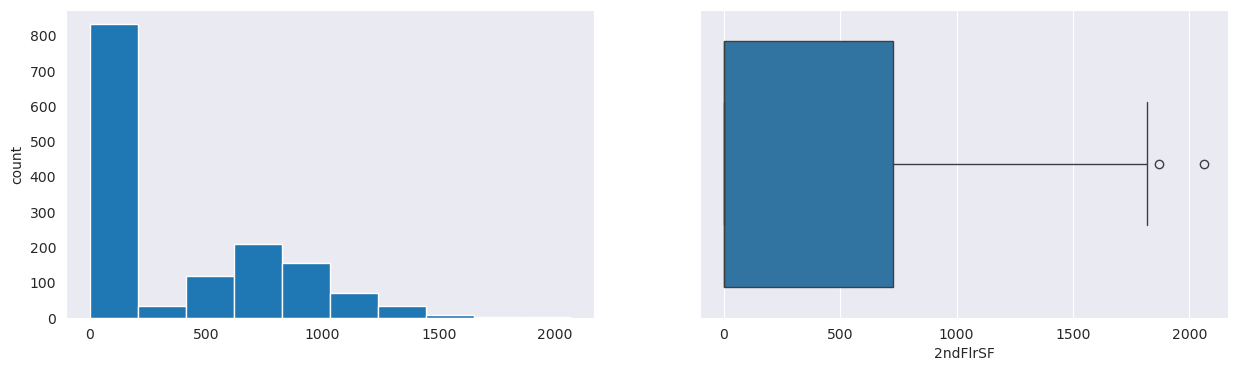

LowQualFinSF
Skew : 9.01


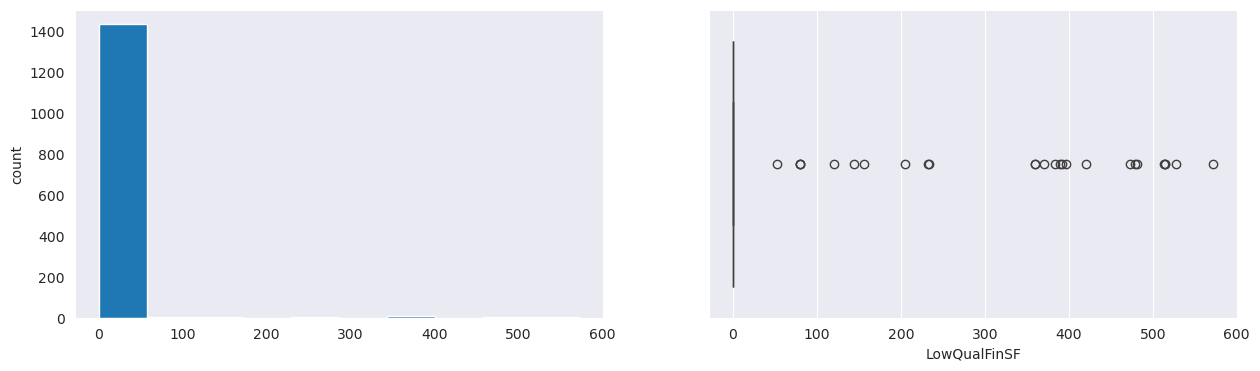

GrLivArea
Skew : 1.37


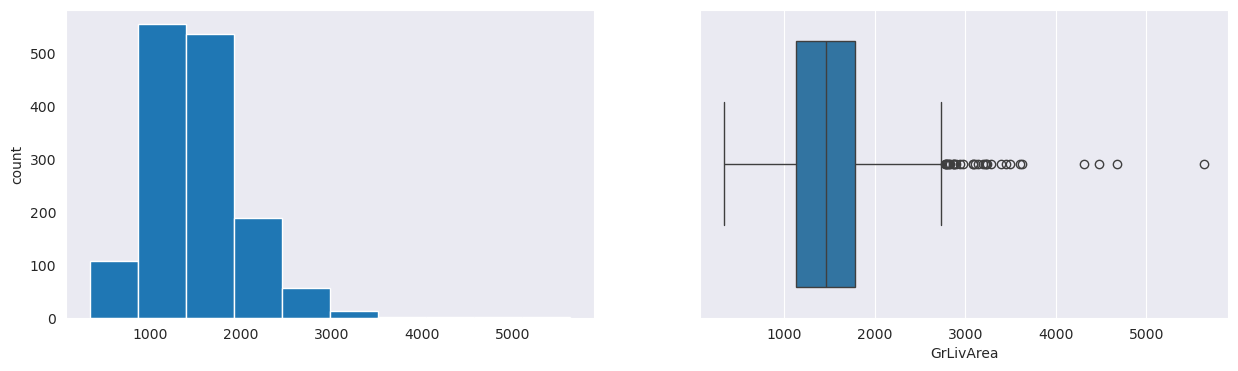

BsmtFullBath
Skew : 0.6


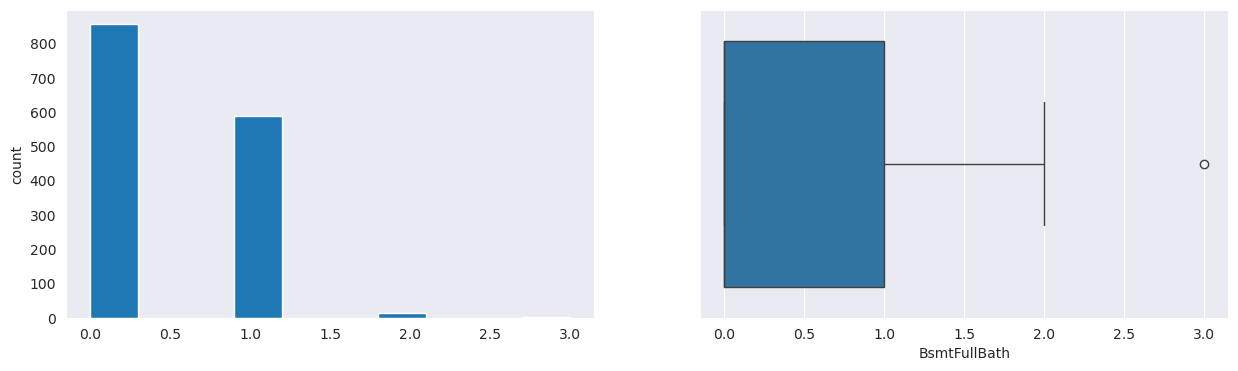

BsmtHalfBath
Skew : 4.1


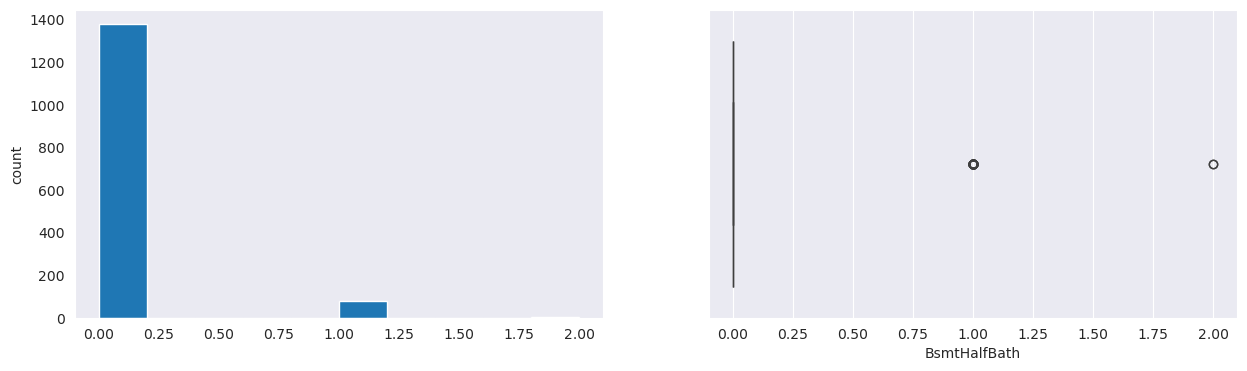

FullBath
Skew : 0.04


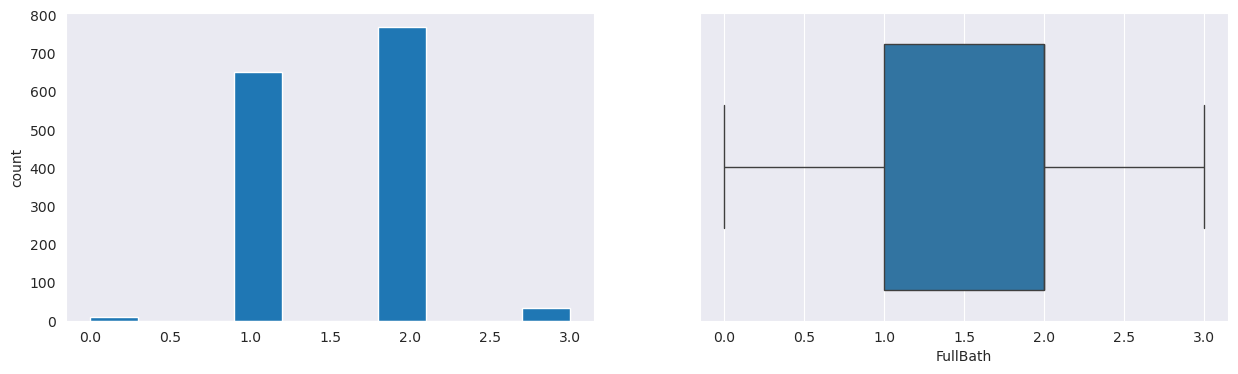

HalfBath
Skew : 0.68


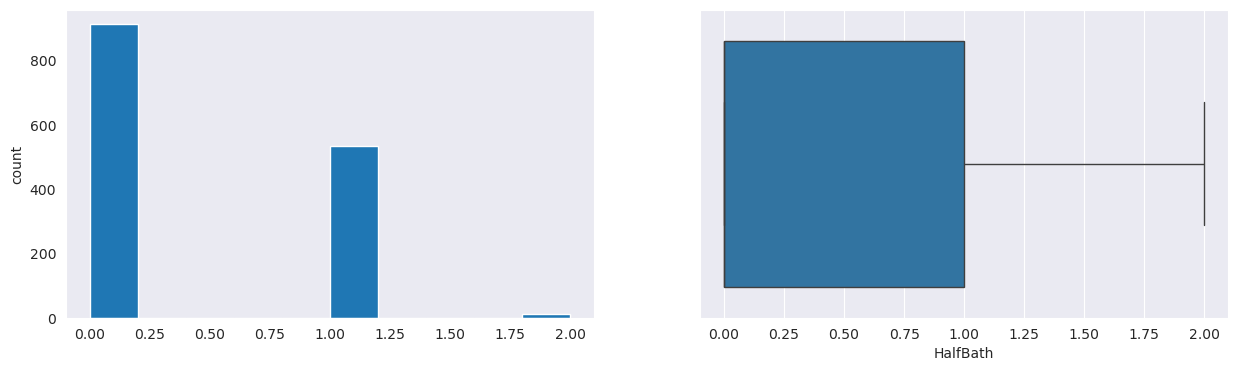

BedroomAbvGr
Skew : 0.21


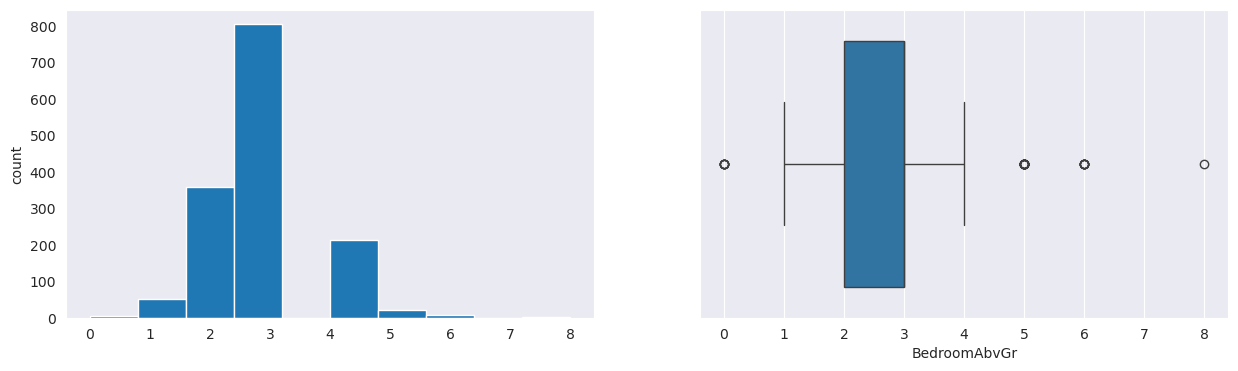

KitchenAbvGr
Skew : 4.49


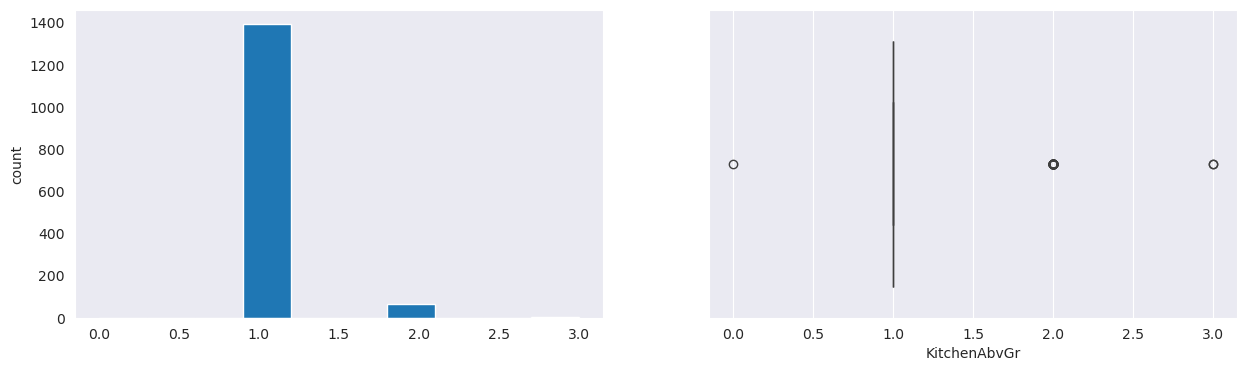

TotRmsAbvGrd
Skew : 0.68


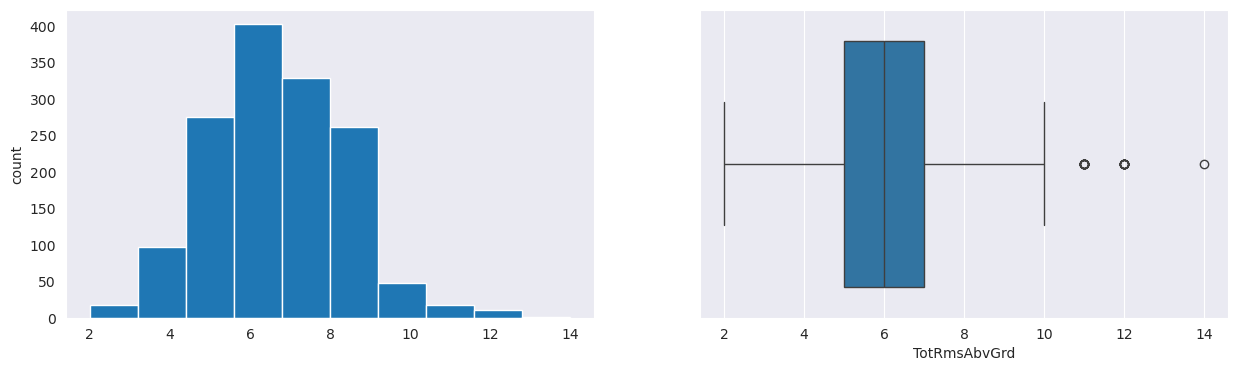

Fireplaces
Skew : 0.65


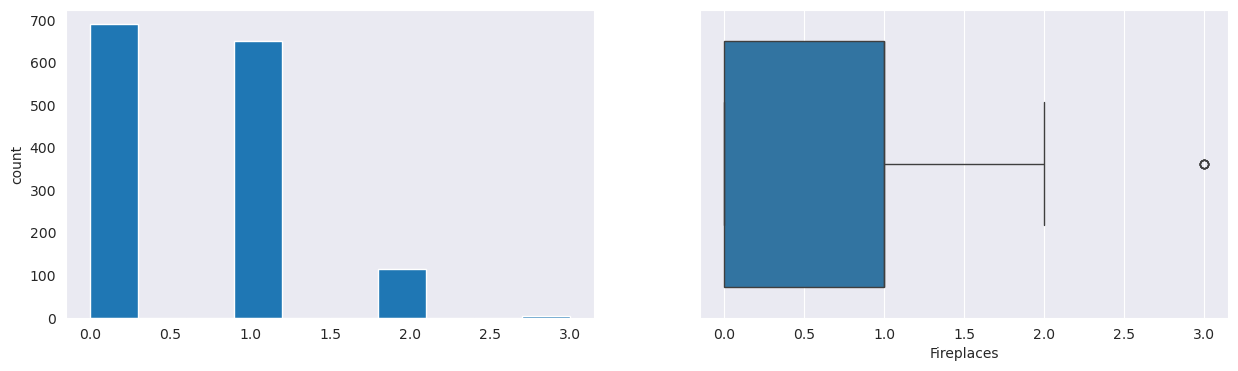

GarageYrBlt
Skew : -0.65


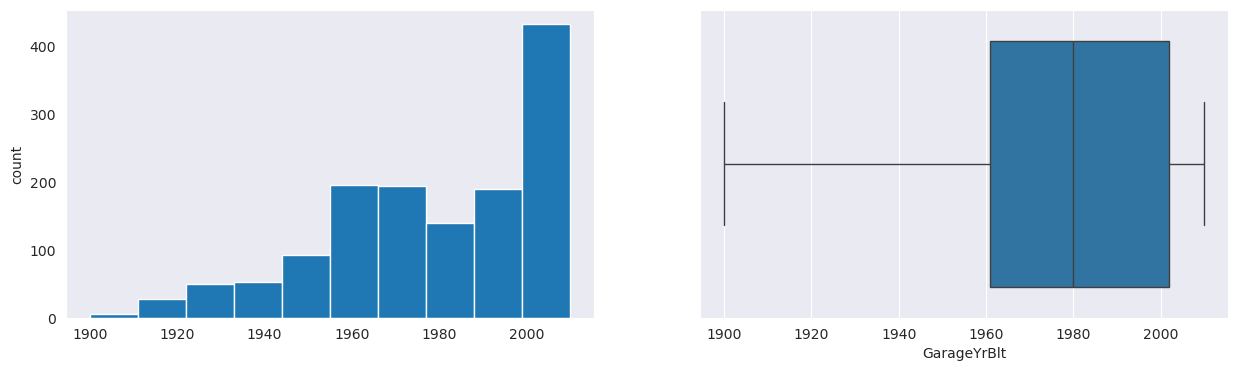

GarageCars
Skew : -0.34


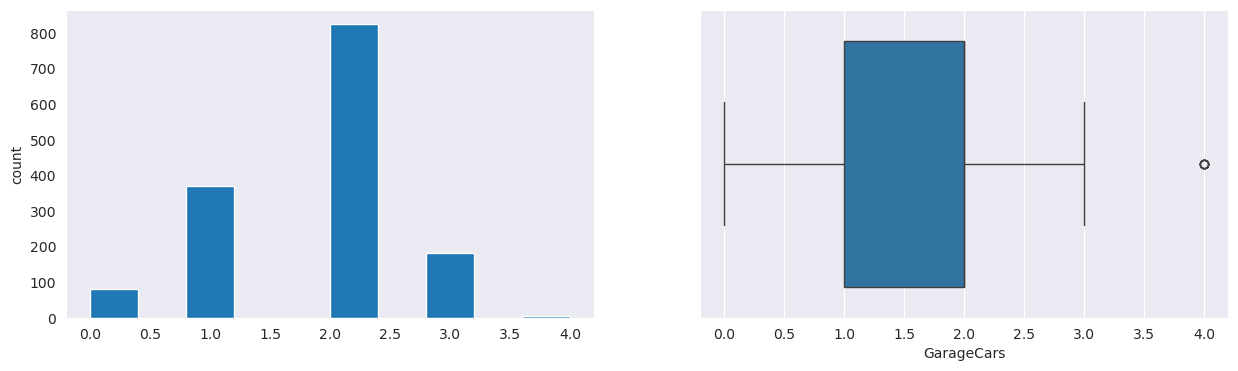

GarageArea
Skew : 0.18


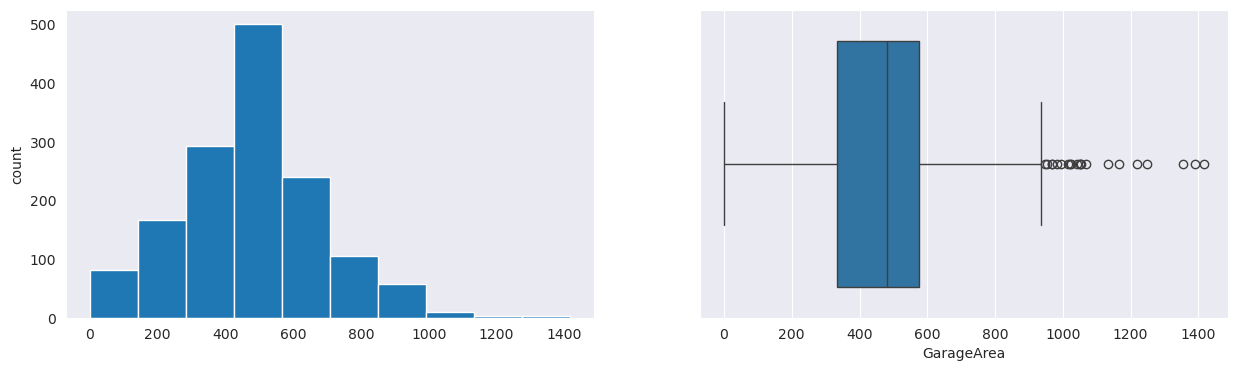

WoodDeckSF
Skew : 1.54


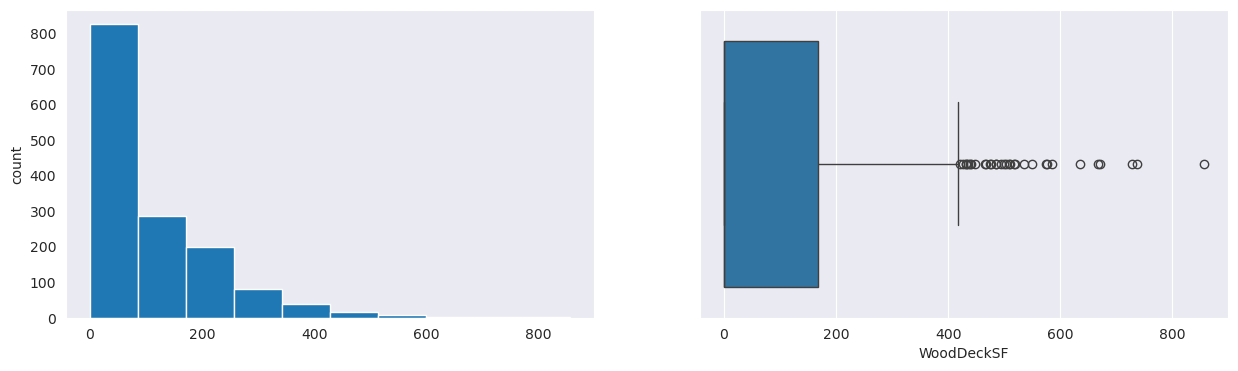

OpenPorchSF
Skew : 2.36


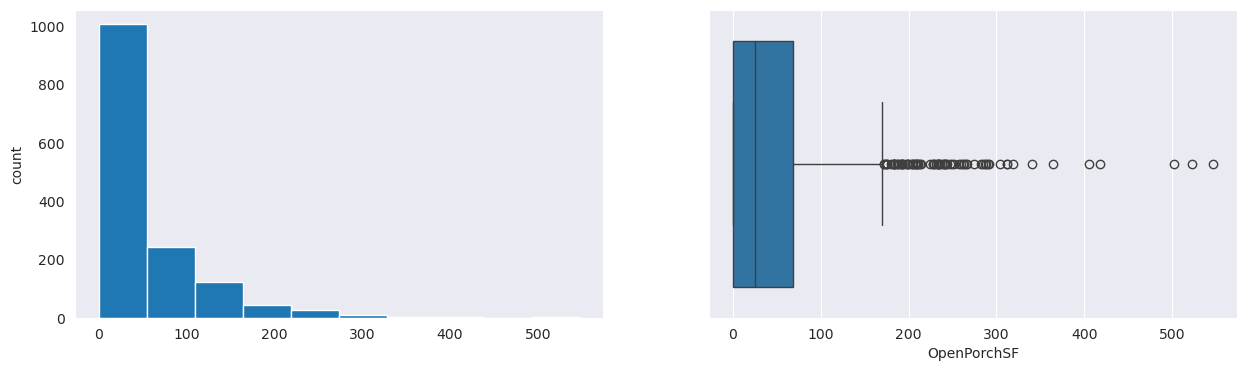

EnclosedPorch
Skew : 3.09


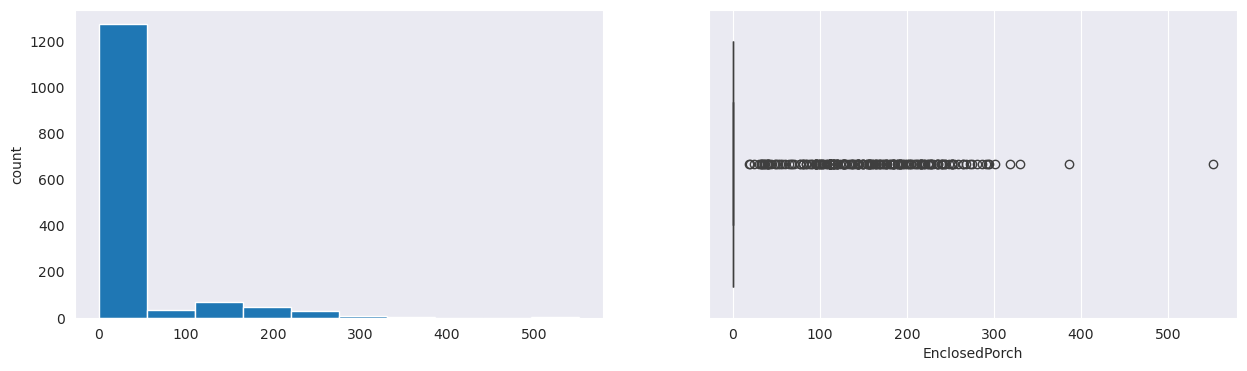

3SsnPorch
Skew : 10.3


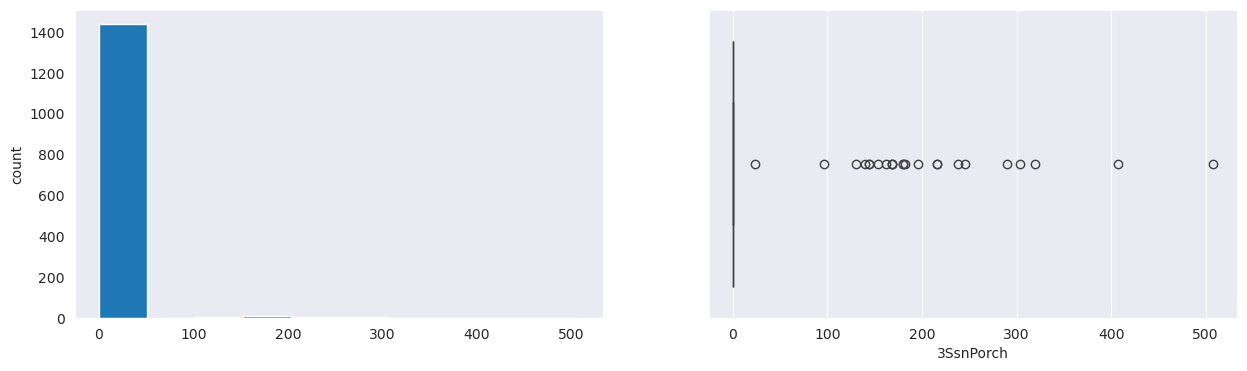

ScreenPorch
Skew : 4.12


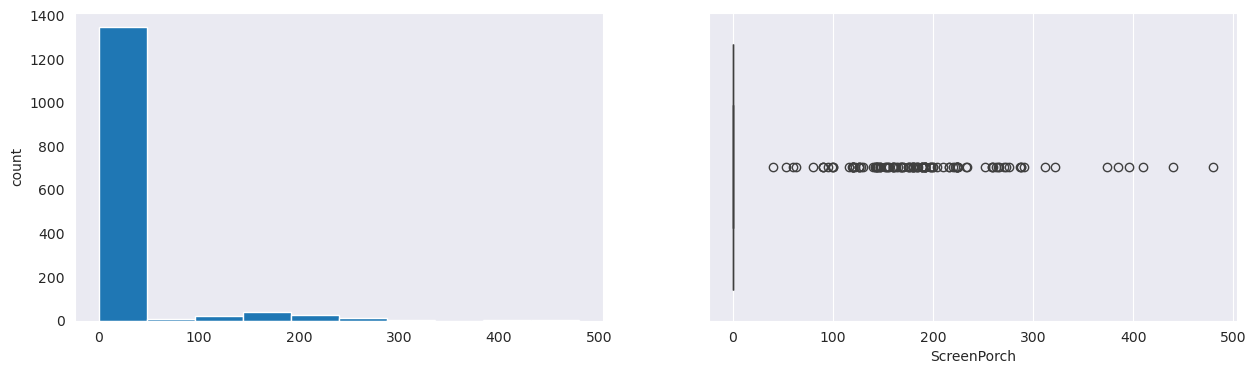

PoolArea
Skew : 14.83


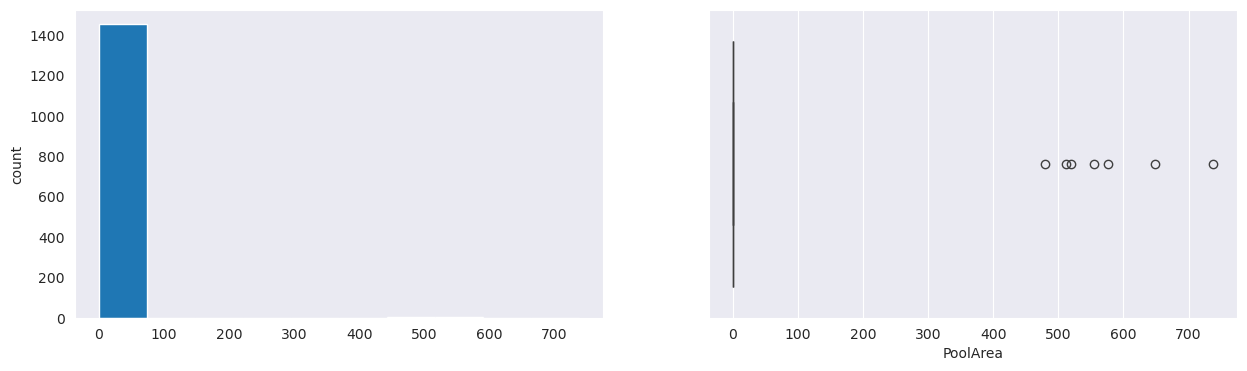

MiscVal
Skew : 24.48


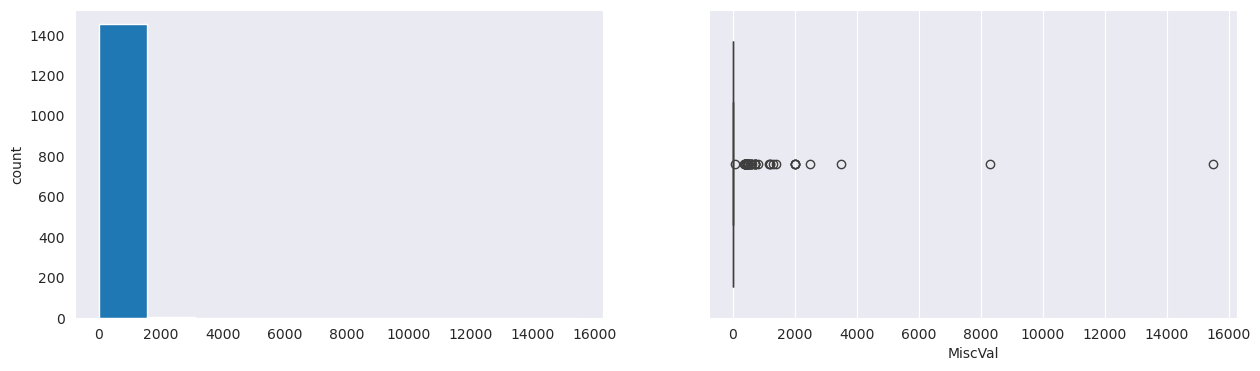

MoSold
Skew : 0.21


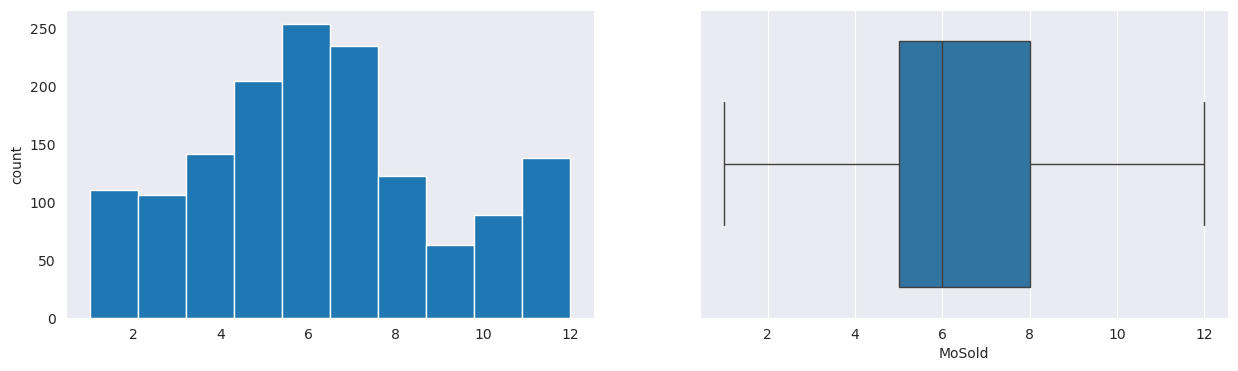

YrSold
Skew : 0.1


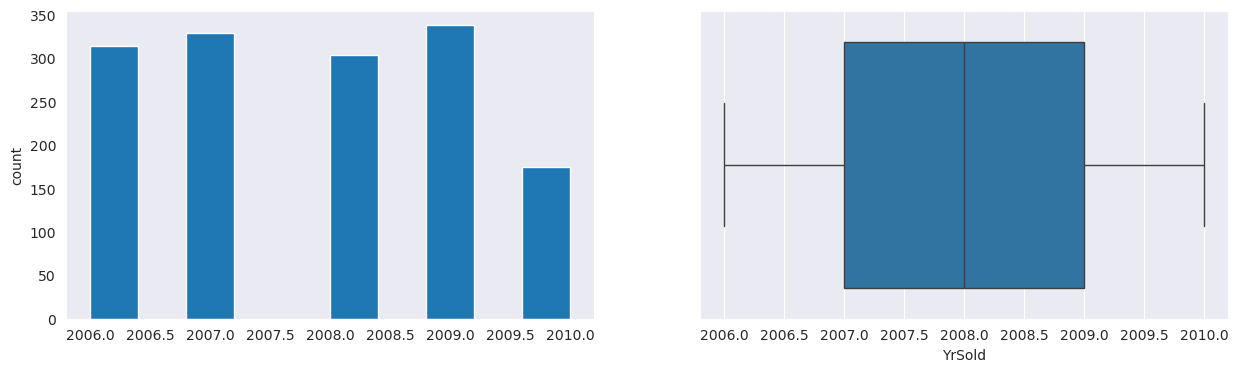

SalePrice
Skew : 1.88


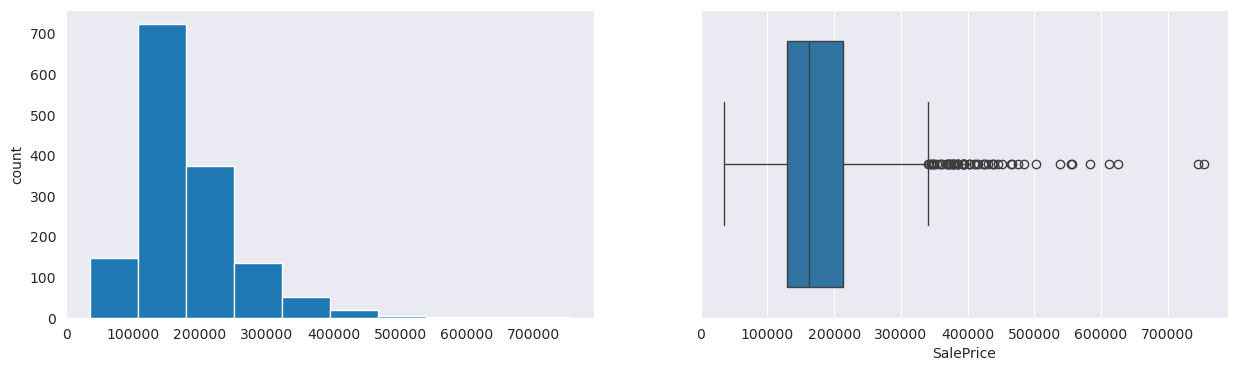

In [114]:
for col in num_train:
    print(col)
    print('Skew :', round(houses_train[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    houses_train[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=houses_train[col])
    plt.show()

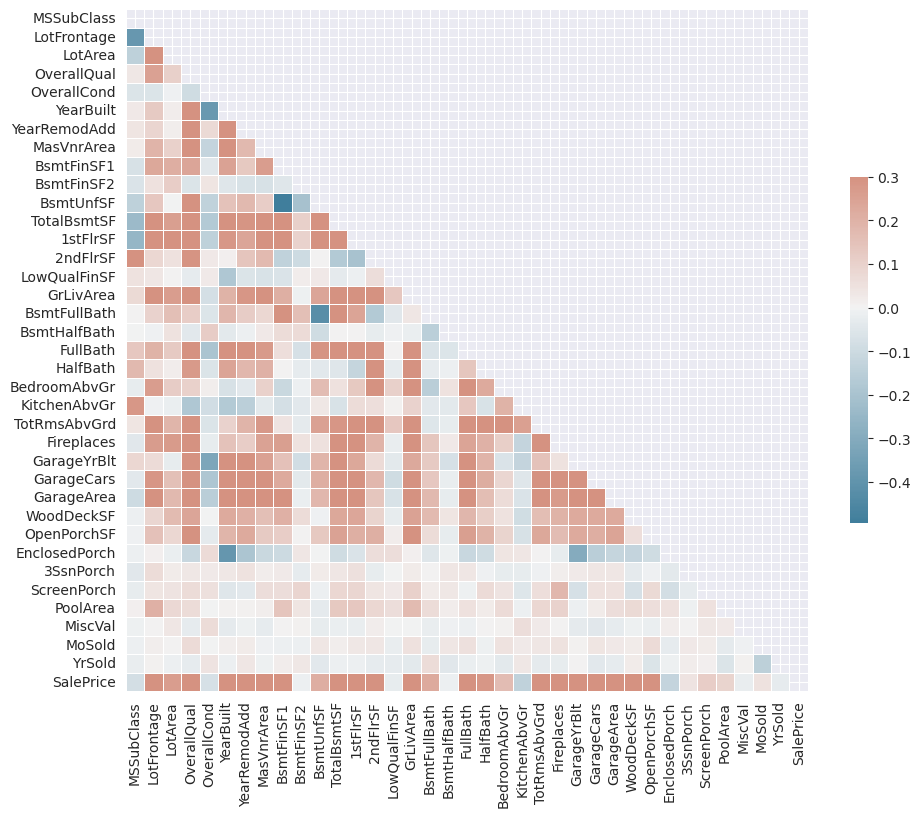

In [115]:
corr = houses_train[num_train].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [116]:
df = pd.concat([houses_train, houses_test])
df.reset_index(drop=True, inplace=True)
df.shape

(2919, 76)

In [117]:
df.isnull().sum().sort_values(ascending=False).head(20)

MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
Functional         2
dtype: int64

In [118]:
# 'PoolQC', 'MiscFeature', 'Alley', 'Fence'

In [119]:
# BedroomAbvGr : NA most likely means 0
df["BedroomAbvGr"] = df["BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
df["BsmtQual"] = df["BsmtQual"].fillna("None")
df["BsmtCond"] = df["BsmtCond"].fillna("None")
df["BsmtExposure"] = df["BsmtExposure"].fillna("None")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0)
df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
df["CentralAir"] = df["CentralAir"].fillna("N")
# Condition : NA most likely means Normal
df["Condition1"] = df["Condition1"].fillna("Norm")
df["Condition2"] = df["Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
df["EnclosedPorch"] = df["EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
df["ExterCond"] = df["ExterCond"].fillna("TA")
df["ExterQual"] = df["ExterQual"].fillna("TA")
# FireplaceQu : data description says NA means "no fireplace"
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["Fireplaces"] = df["Fireplaces"].fillna(0)
# Functional : data description says NA means typical
df["Functional"] = df["Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
df["GarageType"] = df["GarageType"].fillna("None")
df["GarageFinish"] = df["GarageFinish"].fillna("None")
df["GarageQual"] = df["GarageQual"].fillna("None")
df["GarageCond"] = df["GarageCond"].fillna("None")
df["GarageArea"] = df["GarageArea"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df["HalfBath"] = df["HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
df["HeatingQC"] = df["HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
df["KitchenAbvGr"] = df["KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
df["KitchenQual"] = df["KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
df["LotFrontage"] = df["LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
df["LotShape"] = df["LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
df["MiscVal"] = df["MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df["OpenPorchSF"] = df["OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
df["PavedDrive"] = df["PavedDrive"].fillna("N")
# SaleCondition : NA most likely means normal sale
df["SaleCondition"] = df["SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
df["ScreenPorch"] = df["ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
df["Utilities"] = df["Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
df["WoodDeckSF"] = df["WoodDeckSF"].fillna(0)

In [120]:
mss_mapping = {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",
               50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",
               80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",
               150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}

# Dictionary for MoSold mapping
month_mapping = {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}

# Apply mapping using map() function
houses_train['MSSubClass'] = houses_train['MSSubClass'].map(mss_mapping)
houses_train['MoSold'] = houses_train['MoSold'].map(month_mapping)

In [121]:
def map_variables(df):
    mapping_dict = {
        "BsmtCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "BsmtExposure": {"No": 0, "Mn": 1, "Av": 2, "Gd": 3},
        "BsmtFinType1": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
        "BsmtFinType2": {"No": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
        "BsmtQual": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "FireplaceQu": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "Functional": {"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8},
        "GarageCond": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "GarageQual": {"No": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "HeatingQC": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
        "LandSlope": {"Sev": 1, "Mod": 2, "Gtl": 3},
        "LotShape": {"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4},
        "PavedDrive": {"N": 0, "P": 1, "Y": 2},
        "PoolQC": {"No": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
        "Street": {"Grvl": 1, "Pave": 2},
        "Utilities": {"ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4}
    }

    for column, mapping in mapping_dict.items():
        if column in df.columns:
            df[column] = df[column].map(mapping)

    return df

In [122]:
df = map_variables(df)

In [123]:
df["SimplOverallQual"] = df.OverallQual.map({1 : 1, 2 : 1, 3 : 1, # bad
                                             4 : 2, 5 : 2, 6 : 2, # average
                                             7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                            })
df["SimplOverallCond"] = df.OverallCond.map({1 : 1, 2 : 1, 3 : 1, # bad
                                             4 : 2, 5 : 2, 6 : 2, # average
                                             7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                            })
df["SimplGarageCond"] = df.GarageCond.map({1 : 1, # bad
                                           2 : 1, 3 : 1, # average
                                           4 : 2, 5 : 2 # good
                                          })
df["SimplGarageQual"] = df.GarageQual.map({1 : 1, # bad
                                           2 : 1, 3 : 1, # average
                                           4 : 2, 5 : 2 # good
                                          })
df["SimplFireplaceQu"] = df.FireplaceQu.map({1 : 1, # bad
                                             2 : 1, 3 : 1, # average
                                             4 : 2, 5 : 2 # good
                                            })
df["SimplFunctional"] = df.Functional.map({1 : 1, 2 : 1, # bad
                                           3 : 2, 4 : 2, # major
                                           5 : 3, 6 : 3, 7 : 3, # minor
                                           8 : 4 # typical
                                          })
df["SimplKitchenQual"] = df.KitchenQual.map({1 : 1, # bad
                                             2 : 1, 3 : 1, # average
                                             4 : 2, 5 : 2 # good
                                            })
df["SimplHeatingQC"] = df.HeatingQC.map({1 : 1, # bad
                                         2 : 1, 3 : 1, # average
                                         4 : 2, 5 : 2 # good
                                        })
df["SimplBsmtFinType1"] = df.BsmtFinType1.map({1 : 1, # unfinished
                                               2 : 1, 3 : 1, # rec room
                                               4 : 2, 5 : 2, 6 : 2 # living quarters
                                              })
df["SimplBsmtFinType2"] = df.BsmtFinType2.map({1 : 1, # unfinished
                                               2 : 1, 3 : 1, # rec room
                                               4 : 2, 5 : 2, 6 : 2 # living quarters
                                              })
df["SimplBsmtCond"] = df.BsmtCond.map({1 : 1, # bad
                                       2 : 1, 3 : 1, # average
                                       4 : 2, 5 : 2 # good
                                      })
df["SimplBsmtQual"] = df.BsmtQual.map({1 : 1, # bad
                                       2 : 1, 3 : 1, # average
                                       4 : 2, 5 : 2 # good
                                      })
df["SimplExterCond"] = df.ExterCond.map({1 : 1, # bad
                                         2 : 1, 3 : 1, # average
                                         4 : 2, 5 : 2 # good
                                        })
df["SimplExterQual"] = df.ExterQual.map({1 : 1, # bad
                                         2 : 1, 3 : 1, # average
                                         4 : 2, 5 : 2 # good
                                        })

In [124]:
df['GarageYrBlt'] = df['YrSold'] - df['GarageYrBlt']
df['YearBuilt'] = df['YrSold'] - df['YearBuilt']
df['YearRemodAdd'] = df['YrSold'] - df['YearRemodAdd']

df.drop(['YrSold'], axis=1, inplace=True)
df.drop(['MoSold'], axis=1, inplace=True)

In [125]:
df['BsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['TotalBsmtSF'] = df['1stFlrSF'] + df['2ndFlrSF']

df.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
df.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)

In [126]:
df['TotalBaths'] = df['FullBath'] + (0.5*df['HalfBath']) + df['BsmtFullBath'] + (0.5*df['BsmtHalfBath'])

df.drop(['FullBath'], axis=1, inplace=True)
df.drop(['HalfBath'], axis=1, inplace=True)
df.drop(['BsmtFullBath'], axis=1, inplace=True)
df.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [127]:
df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']

df.fillna({'GarageAreaPerCar': 0}, inplace=True)

df.drop(['GarageArea', 'GarageCars'], axis=1, inplace=True)

In [128]:
df = df.dropna()
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                   ..
SimplExterCond      0
SimplExterQual      0
BsmtFinSF           0
TotalBaths          0
GarageAreaPerCar    0
Length: 81, dtype: int64

In [129]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SimplHeatingQC,SimplBsmtFinType1,SimplBsmtFinType2,SimplBsmtCond,SimplBsmtQual,SimplExterCond,SimplExterQual,BsmtFinSF,TotalBaths,GarageAreaPerCar
1,20,RL,80.0,9600,2,4,Lvl,4,FR2,3,...,2,2.0,1.0,1.0,2.0,1,1,978.0,2.5,230.000000
2,60,RL,68.0,11250,2,3,Lvl,4,Inside,3,...,2,2.0,1.0,1.0,2.0,1,2,486.0,3.5,304.000000
3,70,RL,60.0,9550,2,3,Lvl,4,Corner,3,...,2,2.0,1.0,2.0,1.0,1,1,216.0,2.0,214.000000
4,60,RL,84.0,14260,2,3,Lvl,4,FR2,3,...,2,2.0,1.0,1.0,2.0,1,2,655.0,3.5,278.666667
6,20,RL,75.0,10084,2,4,Lvl,4,Inside,3,...,2,2.0,1.0,1.0,2.0,1,2,1369.0,3.0,318.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,RL,80.0,10000,2,4,Lvl,4,Inside,3,...,2,2.0,1.0,1.0,2.0,1,2,1079.0,3.5,278.000000
1451,20,RL,78.0,9262,2,4,Lvl,4,Inside,3,...,2,1.0,1.0,1.0,2.0,1,2,0.0,2.0,280.000000
1455,60,RL,62.0,7917,2,4,Lvl,4,Inside,3,...,2,1.0,1.0,1.0,2.0,1,1,0.0,2.5,230.000000
1456,20,RL,85.0,13175,2,4,Lvl,4,Inside,3,...,1,2.0,1.0,1.0,2.0,1,1,953.0,3.0,250.000000
